In this lab, you will learn how to construct a simple machine learning model given a labelled dataset. We will be analysing the Titanic Dataset, and we will be predicting whether a passenger will survive or not.

In [117]:
import numpy as np
import pandas as pd

# get titanic train & test csv files as a DataFrame
train_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")


# Data Exploration

In this step, we will be analyzing the data given to us. It gives us an idea of what features are important to the determination of Survival of passengers

In [118]:
#Viewing the columns
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [119]:
#Shape ofthe dataframe
train_df.shape

(891, 12)

In [120]:
#viewing the first five rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see below, there are 12 columns, each with largely different ranges. We can observe that there are a total of 891 data points.


In [121]:
#Stats of all columns
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McGowan, Miss. Anna ""Annie""",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [122]:
#data types and non null values
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

# Data Visualization

C:\Users\mirza914\Anaconda2\envs\torch_enc\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


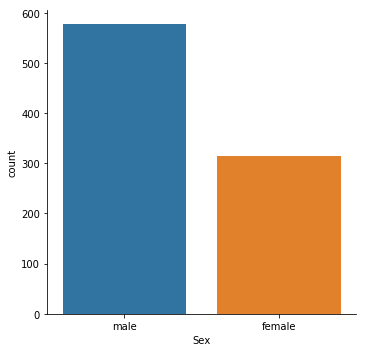

In [123]:
import seaborn as sns

###Who were the passengers on the titanic? (What age, gender, class etc)

###Gender Plot
sns.factorplot('Sex',data=train_df,kind='count')

### Shows more male passengers than female 



C:\Users\mirza914\Anaconda2\envs\torch_enc\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


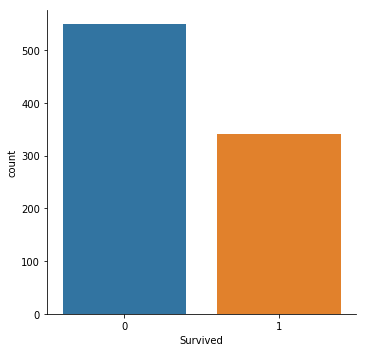

In [124]:
#Number of People who survived


sns.factorplot('Survived',data=train_df,kind='count')



C:\Users\mirza914\Anaconda2\envs\torch_enc\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


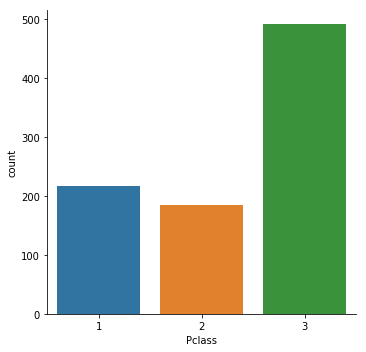

In [125]:
### Class plot
sns.factorplot('Pclass',data=train_df,kind='count')

C:\Users\mirza914\Anaconda2\envs\torch_enc\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


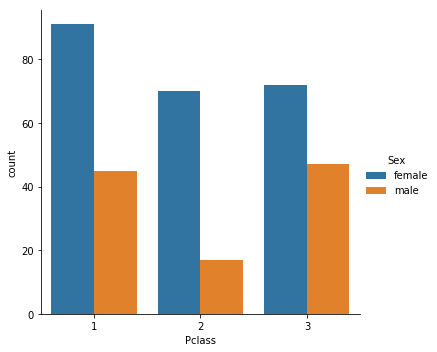

In [126]:


###Interesting! More passengers are from class Three. Now lets find the gender ration among the classes for the people who survived

sns.factorplot('Pclass',data=train_df[train_df.Survived==1],hue='Sex',kind='count')



C:\Users\mirza914\Anaconda2\envs\torch_enc\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


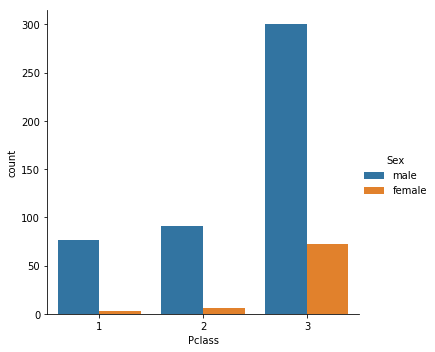

In [127]:
#Now lets find the gender ration among the classes for the people who did not survive
sns.factorplot('Pclass',data=train_df[train_df.Survived==0],hue='Sex',kind='count')

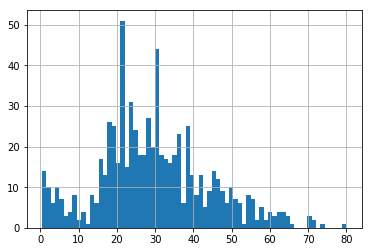

In [128]:


###Now let us look at the ages of the passengers

train_df['Age'].hist(bins=70)



# Feature Selection And Transformation

drop unnecessary columns, these columns won't be useful in analysis and prediction

In [129]:
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [130]:
#Checking for number of null values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Drop the Cabin column as there are many null values and it does not help in making prediction


In [131]:
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

Filling Nan Values

In [132]:
# Embarked

# only in train_df, fill the two missing values with the most occurred value, which is "S".
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [133]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [134]:
# Age 

#filling the NAN values in train and test files with their medians
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

Add SibSp and Parch column to make a new column Family and drop SibSp and Parch

In [135]:
test_df["Family"]=test_df["SibSp"]+test_df["Parch"]
train_df["Family"]=train_df["SibSp"]+train_df["Parch"]

train_df.drop(['SibSp', 'Parch'], axis=1,inplace=True)
test_df.drop(['SibSp', 'Parch'], axis=1,inplace=True)

# One hot Encoding 

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
'Sex' and 'Embarked' are two categorical variables that do not have a order among its values hence we will one hot encode them.

In [136]:
cols_to_transform = [ 'Sex','Embarked'] 

In [137]:
train_df=pd.get_dummies(data=train_df,columns=cols_to_transform)
test_df=pd.get_dummies(data=test_df,columns=cols_to_transform)

# Create Training and Validation Data Split

In [138]:
X=train_df.drop(['Survived'],axis=1)
y=train_df.Survived

In [139]:
#splitting data into training set and validation set
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25)

# Feature Scaling

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.
If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

We always scale the features after splitting the dataset because we want to ensure that the validation data is isolated. This is because the validation data acts as new, unseen data. Any transformation on it will reduce its validity.

 Although there are many methods to scale data, let's use MinMaxScaler from sklearn. Scale the training data.

In [140]:
#Scaling Fare and Age

from sklearn.preprocessing import MinMaxScaler

#TODO
scaler = MinMaxScaler().fit(X_train[['Fare','Age']])            #Instantiate the scaler
scaled_X_train = scaler.transform(X_train[['Fare','Age']])#fit on train data
scaled_X_val = scaler.transform(X_val[['Fare','Age']])#fit on validation data
scaled_test= scaler.transform(test_df[['Fare','Age']])#fit on test data

In [141]:
#converting numpy array to dataframe
scaled_x_train_pd=pd.DataFrame(scaled_X_train ,columns=['Fare','Age'],index=X_train.index)
scaled_x_val_pd=pd.DataFrame(scaled_X_val,columns=['Fare','Age'],index=X_val.index)
scaled_test_pd=pd.DataFrame(scaled_test,columns=['Fare','Age'],index=test_df.index)

In [142]:
#concating scaled features to original dataset
X_train_scaled=pd.concat([scaled_x_train_pd,X_train.drop(['Fare','Age'],axis=1)],axis=1)
X_val_scaled=pd.concat([scaled_x_val_pd,X_val.drop(['Fare','Age'],axis=1)],axis=1)
test_final=pd.concat([scaled_test_pd,test_df.drop(['Fare','Age'],axis=1)],axis=1)

# Model Creation

Now we are finally ready to create a model and train it. Remember that this is a two-class classification problem. We need to select a classifier, not a regressor. 

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
              
#Instantiate a LogisticRegression model and fit it to the training data using fit function

clf_lr = LogisticRegression().fit(X=X_train_scaled,y=y_train)  

# Model Evaluation

These models are now capable of 'predicting' whether a patient has liver disease or not. 
But we need to evaluate their performance. Since it is a two-class classification problem, we can use accuracy. However, let us also use some additional metrics for better analysis, precision,recall, and f1score.

# Performance Metrics

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
y_pred_lr = clf_lr.predict(X_val_scaled)
acc_lr = accuracy_score(y_true=y_val,y_pred=y_pred_lr)

print("The accuracy of LogisticRegression: {} %".format(acc_lr))

The accuracy of LogisticRegression: 0.8161434977578476 %


In [147]:
#Precision And Recall
from sklearn.metrics import precision_score,recall_score

prec_lr = precision_score(y_true=y_val,y_pred=y_pred_lr)

recall_lr = recall_score(y_true=y_val,y_pred=y_pred_lr)

print("The precision of LogisticRegression: {} %".format(prec_lr))
print("The recall of LogisticRegression: {} %".format(recall_lr))

The precision of LogisticRegression: 0.7380952380952381 %
The recall of LogisticRegression: 0.7654320987654321 %


In [148]:
#f1 score
from sklearn.metrics import f1_score

f1_lr = f1_score(y_true=y_val,y_pred=y_pred_lr)

print("The F1-score of LogisticRegression: {} %".format(f1_lr))

The F1-score of LogisticRegression: 0.7515151515151515 %


# Cross Validation and Performance Analysis

We will be doing a k-fold cross validation on the dataset to get a better generalized accuracy.

Calculating 6-fold cross validation score using the cross_val_score() function. Parameter 'cv' defines the number of folds.

In [149]:
from sklearn.model_selection import cross_val_score

clf_lr=LogisticRegression()

scores1 = cross_val_score(clf_lr, X_train_scaled, y_train, cv=6, scoring='accuracy')             #Use cross_val_score for clf_lr
av_score1 =scores1.mean()            #Calculate average score for clf_lr


print("Average Cross Validation Score for clf_lr: {}".format(av_score1))


Average Cross Validation Score for clf_lr: 0.7890083265083265


# Hyperparameter Tuning

How do we optimize the classifier in order to produce the best results? We need to tune the model by varying various hyperparameters. We can use GridSearchCV to simplify the whole process.

     For GridSearchCV, carry out the following steps(We will only do this for one classifier, so choose one of your previous classifiers):

    -Initialize a new classifier object
    -Create a dictionary of parameters you wish to tune.(e.g. parameters = {'param_name':[list of values]})
    -Note: Avoid tuning the max_features parameter of your learner if that parameter is available!
    -Use make_scorer to create an accuracy_score object
    -Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.
    -Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.



In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


clf = LogisticRegression()        #Initialize the classifier object

parameters = {
    'C':[0.01,0.1,1,10,100]
}    #Dictionary of parameters

scorer = make_scorer(accuracy_score)         #Initialize the scorer using make_scorer

grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(X_train_scaled,y_train)        #Fit the gridsearch object with X_train,y_train

best_clf = grid_fit.best_estimator_         #Get the best estimator.

unoptimized_predictions = LogisticRegression().fit(X_train_scaled,y_train).predict(X_val_scaled)       #Using the unoptimized classifiers, generate predictions
optimized_predictions = best_clf.predict(X_val_scaled)        #Same, but use the best estimator

acc_unop = accuracy_score(y_true=y_val,y_pred=unoptimized_predictions)      #Calculate accuracy for unoptimized model
acc_op =  accuracy_score(y_true=y_val,y_pred=optimized_predictions)          #Calculate accuracy for optimized model

print("Accuracy score on unoptimized model:{}".format(acc_unop))
print("Accuracy score on optimized model:{}".format(acc_op))

Accuracy score on unoptimized model:0.8161434977578476
Accuracy score on optimized model:0.8161434977578476
